In [ ]:
# **Google DA Certificate Case Study 1**
**How Does a Bike-Share Navigate Speedy Success?**
# **An Hu**
# **Data Analsyt**
# **2023/02/08**

# **Background**
In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geo-tracked and locked into a network of 692 stations across Chicago.

Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.

# **Case study**
This report will examine the business question: 'what is the most effective marketing strategy to converting Cyclistic’s casual riders to annul memberships?'

It is understood that the goal can be broken down into 3 main questions.

* How do annual members and casual riders use Cyclistic bikes differently?
* Why would casual riders buy Cyclistic annual memberships?
* How can Cyclistic use digital media to influence casual riders to become members?

This report will seek to deliver on the following objectives:

How do annual members and casual riders use Cyclistic bikes differently?

# **Stakeholders**
This report also seeks to identify the important stakeholders that are involved in the overall analysis. This includes:

* Cyclistic users
* Director of marketing
* Cyclistic marketing team
* Cyclistic executive team

# **Data sources**
User data from the past 12 months, January 2022 - December 2022 has been made available. Each data set is in csv format and details every ride logged by Cyclistic customers. This data has been made publicly available via license by Motivate International Inc. and the city of Chicago available here. All user’s personal data has been scrubbed for privacy, which  means that you won’t be able to connect pass purchases to credit card numbers to determine if casual riders live in the
Cyclistic service area or if they have purchased multiple single passes.

Documentation, cleaning and preparation of data for analysis
Tools for analysis
R is being used due to the data size and visualizations needed to complete this analysis.

# **Documentation, cleaning and preparation of data for analysis**
* **Tools for analysis**
R is being used due to the data size and visualizations needed to complete this analysis.

* **Preparation of Data**


Install required packages
* tidyverse for data import and wrangling
* lubridate for date functions
* ggplot for visualization

In [2]:
library(tidyverse) #helps wrangle data
library(lubridate) #helps wrangle date attributes
library(ggplot2) #helps visualize data

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: timechange


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




# Step 1: Collect Data

In [3]:
# import datasets
t202201 <- read.csv('/kaggle/input/cyclistic-2022/202201-divvy-tripdata.csv')
t202202 <- read.csv('/kaggle/input/cyclistic-2022/202202-divvy-tripdata.csv')
t202203 <- read.csv('/kaggle/input/cyclistic-2022/202203-divvy-tripdata.csv')
t202204 <- read.csv('/kaggle/input/cyclistic-2022/202204-divvy-tripdata.csv')
t202205 <- read.csv('/kaggle/input/cyclistic-2022/202205-divvy-tripdata.csv')
t202206 <- read.csv('/kaggle/input/cyclistic-2022/202206-divvy-tripdata.csv')
t202207 <- read.csv('/kaggle/input/cyclistic-2022/202207-divvy-tripdata.csv')
t202208 <- read.csv('/kaggle/input/cyclistic-2022/202208-divvy-tripdata.csv')
t202209 <- read.csv('/kaggle/input/cyclistic-2022/202209-divvy-tripdata.csv')
t202210 <- read.csv('/kaggle/input/cyclistic-2022/202210-divvy-tripdata.csv')
t202211 <- read.csv('/kaggle/input/cyclistic-2022/202211-divvy-tripdata.csv')
t202212 <- read.csv('/kaggle/input/cyclistic-2022/202212-divvy-tripdata.csv')


# STEP 2: WRANGLE DATA AND COMBINE INTO A SINGLE FILE


In [4]:
# Stack individual month's data frames into one big data frame
t2022 <- rbind(t202201,t202202,t202203,t202204,t202205,t202206,t202207,t202208,t202209,t202210,t202211,t202212)

Review the new created dataset

In [5]:
View(t2022) #combine all datasets

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01280,-87.66591,42.01256,-87.67437,casual
A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01276,-87.66597,42.01256,-87.67437,casual
BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.92560,-87.65371,41.92533,-87.66580,member
CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.98359,-87.66915,41.96151,-87.67139,casual
DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.87785,-87.62408,41.88462,-87.62783,member
A39C6F6CC0586C0B,classic_bike,2022-01-11 18:48:09,2022-01-11 18:51:31,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,41.89563,-87.67207,41.90312,-87.67394,member
BDC4AB637EDF981B,classic_bike,2022-01-30 18:32:52,2022-01-30 18:49:26,Oakley Ave & Irving Park Rd,KA1504000158,Broadway & Sheridan Rd,13323,41.95434,-87.68608,41.95283,-87.64999,member
81751A3186E59A6B,classic_bike,2022-01-22 12:20:02,2022-01-22 12:32:06,Sheffield Ave & Fullerton Ave,TA1306000016,Damen Ave & Clybourn Ave,13271,41.92560,-87.65371,41.93193,-87.67786,member
154222B86A338ABD,electric_bike,2022-01-17 07:34:41,2022-01-17 08:00:08,Racine Ave & 15th St,13304,Clinton St & Washington Blvd,WL-012,41.86125,-87.65650,41.88338,-87.64117,member


In [6]:
#Remove irrelevent colunms
t2022 <- t2022 %>%  
  select(-c(ride_id, rideable_type, start_station_name, start_lat, start_lng, end_lat, end_lng, start_station_id,end_station_id, end_station_name))

# STEP 3: CLEAN UP AND ADD DATA TO PREPARE FOR ANALYSIS

In [7]:
# Inspect the new table that has been created
colnames(t2022)  #List of column names
nrow(t2022)  #How many rows are in data frame?
dim(t2022)  #Dimensions of the data frame?
head(t2022)  #See the first 6 rows of data frame.  Also tail(t2022)
str(t2022)  #See list of columns and data types (numeric, character, etc)
summary(t2022)  #Statistical summary of data. Mainly for numerics


[1] "started_at"    "ended_at"      "member_casual"

[1] 5667717

[1] 5667717       3

,started_at,ended_at,member_casual
,<chr>,<chr>,<chr>
1,2022-01-13 11:59:47,2022-01-13 12:02:44,casual
2,2022-01-10 08:41:56,2022-01-10 08:46:17,casual
3,2022-01-25 04:53:40,2022-01-25 04:58:01,member
4,2022-01-04 00:18:04,2022-01-04 00:33:00,casual
5,2022-01-20 01:31:10,2022-01-20 01:37:12,member
6,2022-01-11 18:48:09,2022-01-11 18:51:31,member


'data.frame':	5667717 obs. of  3 variables:
 $ started_at   : chr  "2022-01-13 11:59:47" "2022-01-10 08:41:56" "2022-01-25 04:53:40" "2022-01-04 00:18:04" ...
 $ ended_at     : chr  "2022-01-13 12:02:44" "2022-01-10 08:46:17" "2022-01-25 04:58:01" "2022-01-04 00:33:00" ...
 $ member_casual: chr  "casual" "casual" "member" "casual" ...


  started_at          ended_at         member_casual     
 Length:5667717     Length:5667717     Length:5667717    
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  

**To better analysis, more colunms are need to better understand the datasets:**
1. The data can only be aggregated at the ride-level, which is too granular. We will want to add some additional columns of data -- such as day, month, year -- that provide additional opportunities to aggregate the data.
2. We will want to add a calculated field for length of ride since the t2022 data did not have the "tripduration" column. We will add "ride_length" to the entire dataframe for consistency.

In [8]:
# Add columns that list the date, month, day
# This will allow us to aggregate ride data for each month, or day ... before completing these operations we could only aggregate at the ride level

t2022$date <- as.Date(t2022$started_at) #The default format is yyyy-mm-dd
t2022$month <- format(as.Date(t2022$date), "%m")
t2022$day <- format(as.Date(t2022$date), "%d")
t2022$day_of_week <- format(as.Date(t2022$date), "%A")


In [9]:
# Add a "ride_length" calculation to all_trips (in seconds)
# https://stat.ethz.ch/R-manual/R-devel/library/base/html/difftime.html
t2022$ride_length <- difftime(t2022$ended_at,t2022$started_at)


In [10]:
# Inspect the structure of the columns
str(t2022)


'data.frame':	5667717 obs. of  8 variables:
 $ started_at   : chr  "2022-01-13 11:59:47" "2022-01-10 08:41:56" "2022-01-25 04:53:40" "2022-01-04 00:18:04" ...
 $ ended_at     : chr  "2022-01-13 12:02:44" "2022-01-10 08:46:17" "2022-01-25 04:58:01" "2022-01-04 00:33:00" ...
 $ member_casual: chr  "casual" "casual" "member" "casual" ...
 $ date         : Date, format: "2022-01-13" "2022-01-10" ...
 $ month        : chr  "01" "01" "01" "01" ...
 $ day          : chr  "13" "10" "25" "04" ...
 $ day_of_week  : chr  "Thursday" "Monday" "Tuesday" "Tuesday" ...
 $ ride_length  : 'difftime' num  177 261 261 896 ...
  ..- attr(*, "units")= chr "secs"


 **Convert "ride_length" from Factor to numeric so we can run calculations on the data**

In [11]:
t2022$ride_length <- as.numeric(as.character(t2022$ride_length)) #change datatype to numeric for further analysis

**Remove "bad" data**


In [12]:
t2022_v2 <- t2022[!(t2022$ride_length<0),]

# STEP 4: CONDUCT DESCRIPTIVE ANALYSIS

In [13]:
# Descriptive analysis on ride_length (all figures in seconds)
mean(t2022_v2$ride_length) #straight average (total ride length / rides)
median(t2022_v2$ride_length) #midpoint number in the ascending array of ride lengths
max(t2022_v2$ride_length) #longest ride
min(t2022_v2$ride_length) #shortest ride


[1] 1166.757

[1] 617

[1] 2483235

[1] 0

Compare the difference between members and casual users.

In [14]:
# Compare members and casual users
aggregate(t2022_v2$ride_length ~ t2022_v2$member_casual, FUN = mean)
aggregate(t2022_v2$ride_length ~ t2022_v2$member_casual, FUN = median)
aggregate(t2022_v2$ride_length ~ t2022_v2$member_casual, FUN = max)
aggregate(t2022_v2$ride_length ~ t2022_v2$member_casual, FUN = min)


t2022_v2$member_casual,t2022_v2$ride_length
<chr>,<dbl>
casual,1748.7433
member,762.8406


t2022_v2$member_casual,t2022_v2$ride_length
<chr>,<dbl>
casual,780
member,530


t2022_v2$member_casual,t2022_v2$ride_length
<chr>,<dbl>
casual,2483235
member,93594


t2022_v2$member_casual,t2022_v2$ride_length
<chr>,<dbl>
casual,0
member,0


 See the average ride time by each day for members vs casual users.

In [15]:
aggregate(t2022_v2$ride_length ~ t2022_v2$member_casual + t2022_v2$day_of_week, FUN = mean)
t2022_v2$day_of_week <- ordered(t2022_v2$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))
aggregate(t2022_v2$ride_length ~ t2022_v2$member_casual + t2022_v2$month, FUN = mean)

t2022_v2$member_casual,t2022_v2$day_of_week,t2022_v2$ride_length
<chr>,<chr>,<dbl>
casual,Friday,1682.6551
member,Friday,751.8463
casual,Monday,1751.2417
member,Monday,736.2065
casual,Saturday,1956.8451
member,Saturday,848.4037
casual,Sunday,2043.4767
member,Sunday,841.8746
casual,Thursday,1532.8751


t2022_v2$member_casual,t2022_v2$month,t2022_v2$ride_length
<chr>,<chr>,<dbl>
casual,01,1822.6473
member,01,718.8906
casual,02,1602.5071
member,02,684.3318
casual,03,1957.3910
member,03,717.4997
casual,04,1771.9456
member,04,689.5442
casual,05,1852.1834


Now analyze ridership data by type and weekday.

In [16]:
t2022_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>%  #creates weekday field using wday()
  group_by(member_casual, weekday) %>%  #groups by usertype and weekday
  summarise(number_of_rides = n()							#calculates the number of rides and average duration 
  ,average_duration = mean(ride_length)) %>% 		# calculates the average duration
  arrange(member_casual, weekday)								# sorts


`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


member_casual,weekday,number_of_rides,average_duration
<chr>,<ord>,<int>,<dbl>
casual,Sun,389011,2043.4767
casual,Mon,277671,1751.2417
casual,Tue,263731,1549.3721
casual,Wed,274354,1485.0507
casual,Thu,309327,1532.8751
casual,Fri,334698,1682.6551
casual,Sat,473185,1956.8451
member,Sun,387208,841.8746
member,Mon,473335,736.2065


Let's visualize!

In [1]:
# Based on Days of Week
# the number of rides by rider type
t2022_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge")

# for average duration
t2022_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge")


ERROR: Error in t2022_v2 %>% mutate(weekday = wday(started_at, label = TRUE)) %>% : could not find function "%>%"


`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


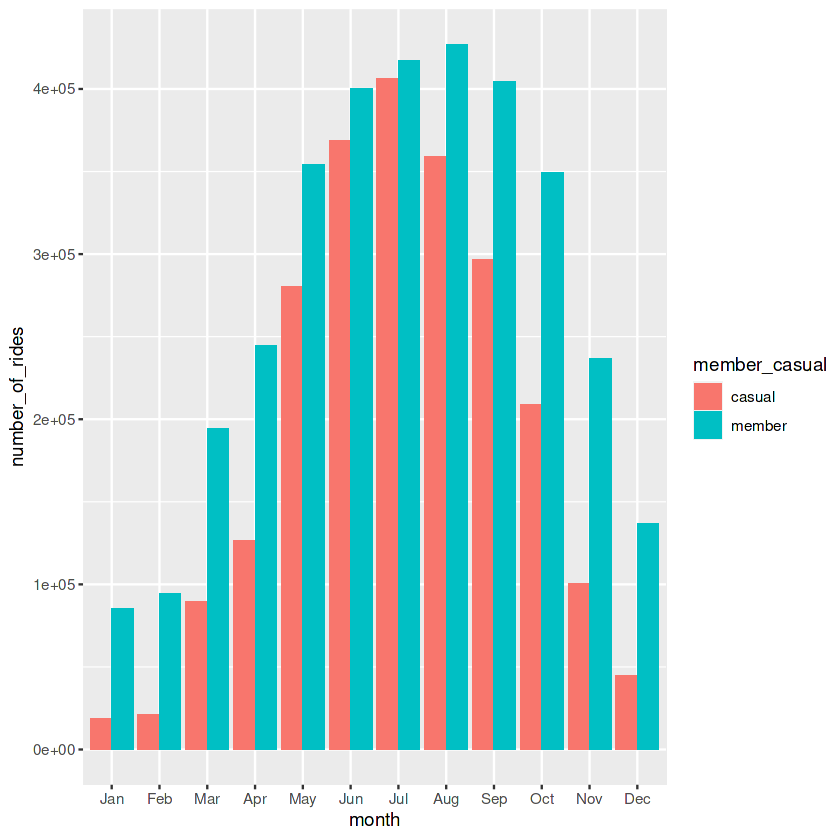

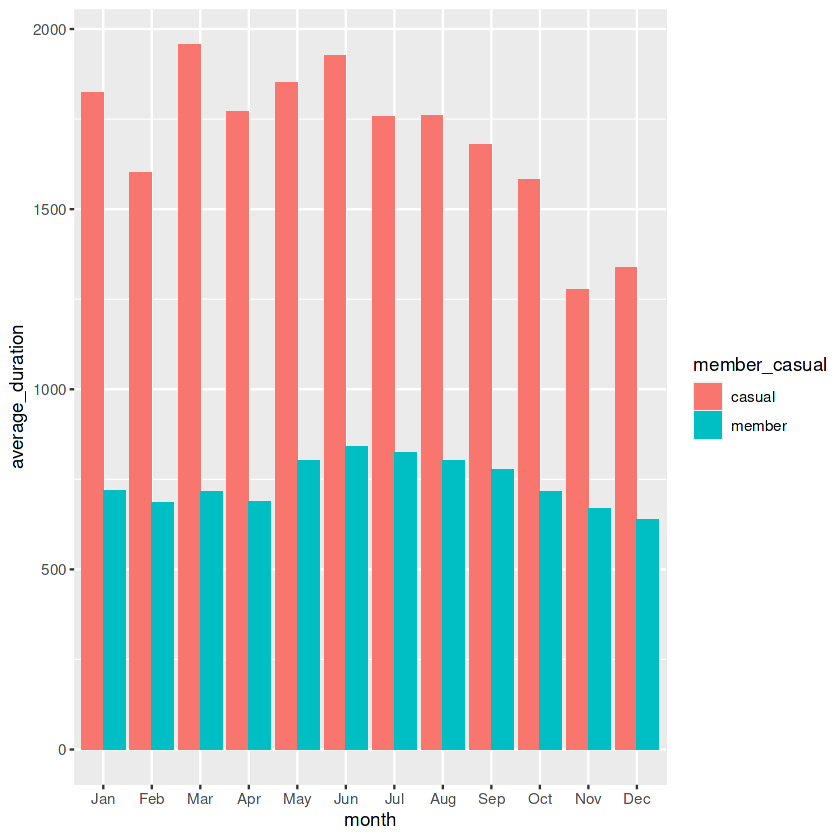

In [17]:
#  Based on Months
# the number of rides by rider type
t2022_v2 %>% 
  mutate(month = month(started_at, label = TRUE)) %>% 
  group_by(member_casual, month) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, month)  %>% 
  ggplot(aes(x = month, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge")

# for average duration
t2022_v2 %>% 
  mutate(month = month(started_at, label = TRUE)) %>% 
  group_by(member_casual, month) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, month)  %>% 
  ggplot(aes(x = month, y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge")


# STEP 5: EXPORT SUMMARY FILE FOR FURTHER ANALYSIS
Create a csv file that we will visualize in Excel, Tableau, or my presentation software


In [18]:
counts <- aggregate(t2022_v2$ride_length ~ t2022_v2$member_casual + t2022_v2$day_of_week, FUN = mean)
write.csv(counts, file = '2022_weekday_avg_ride_length.csv')
counts <- aggregate(t2022_v2$ride_length ~ t2022_v2$member_casual + t2022_v2$month, FUN = mean)
write.csv(counts, file = '2022_month_avg_ride_length.csv')

# What does the data tell us?

**Key takeaways**

Casual users tended to ride more so in the warmer months of Chicago, namely June- August. Their participation exceeded that of the long term members.

To further that the Casual demographic spent on average a lot longer time per ride than their long-term counter-parts.

The days of the week also further shows that causal riders prefer to use the service during the weekends as their usage peaked then. The long term members conversly utilised the service more-so throughout the typical work week i.e (Monday- friday)
Long term riders tended to stick more so to classic bikes as opposed to the docked or electric bikes.

**Recommendations**

This report recommends the following:

* Introducing plans thats may be more appealing to casuals for the summer months, a seasonal pass for example. This marketing should be done during the winter months in preperation.

* The casual users might be more interested in a memebrship option that allows for per-use balance card. Alternatively, the existing payment structure may be altered in order to make single-use more costly to the casual riders as well as lowering the long-term membership rate.

* Membership rates specifically for the warmer months as well as for those who only ride on the weekends would assist in targeting the casual riders more specifically.

# Things to Consider

**Additional points that were not examined**

The report understands the scope of this analysis is extremely limited and because of that fact, additional data, as well as data points may have been able to contribute to this report offering an even more granular analysis. The following are data points that could have enhanced the report:

* Age and gender: This would add a dynamic to whether or not customers are being targeted across demograpic lines. Is the existing marketing effective? Is there potential for more inclusive targeting?

* Pricing structure: THe actual pricing plans data was not provided and would give further insight to which plans are the most popular and by (how much) when comparing them. It would also be effective to understanding the spending behaviour of casual user.

* Household income data: Pinpointing the average income of the long-term memebrs as compared to the casual counter-parts would allow for further analysis of what is the typical economic standing of each type of member, as well as providing the ability to analysis overall price sensitivity between the two different membership types.

Thank you for your time!